# 네이버뉴스

"네이버 뉴스에서 '아시아나' 키워드로 특정 기간(2024년 6월 1일부터 2024년 11월 30일까지) 동안의 뉴스 데이터를 검색하여, 뉴스 제목(title), 링크(link), 요약(summary)을 최대 20페이지까지 수집하고, 이를 CSV 파일(news_results_asiana.csv)로 저장하는 스크래핑 프로그램"

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv

def search_naver_news(keyword, start_date, end_date, max_pages=1):
    base_url = "https://search.naver.com/search.naver"
    results = []
    
    for page in range(1, max_pages + 1):
        params = {
            'where': 'news',
            'query': keyword,
            'sm': 'tab_pge',
            'start': (page - 1) * 10 + 1,
            'nso': f'so:r,p:from{start_date}to{end_date}'
        }
        response = requests.get(base_url, params=params)
        if response.status_code != 200:
            print(f"Error fetching page {page}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        news_items = soup.select('ul.list_news > li')

        for item in news_items:
            title_tag = item.select_one('a.news_tit')
            title = title_tag.text if title_tag else 'No Title'
            link = title_tag['href'] if title_tag else 'No Link'
            summary_tag = item.select_one('div.dsc_wrap')
            summary = summary_tag.text if summary_tag else 'No Summary'
            results.append({'title': title, 'link': link, 'summary': summary})
        
        # 요청 간 간격을 두기 위해 추가
        time.sleep(5)
    
    return results

# 검색 실행
keyword = "아시아나"
start_date = "20240601"  # YYYYMMDD 형식
end_date = "20241130"
# news_results = search_naver_news(keyword, start_date, end_date, max_pages=2)
news_results = search_naver_news(keyword, start_date, end_date, max_pages=20)

# 중복 제거
unique_results = {result['link']: result for result in news_results}.values()

# 결과 출력
for news in news_results:
    print(f"Title: {news['title']}")
    print(f"Link: {news['link']}")
    print(f"Summary: {news['summary']}")
    print("-" * 80)

# CSV 저장
with open('news_results_asiana.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['title', 'link', 'summary']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(news_results)

print("Results saved to news_results_asiana.csv")


Title: 아시아나 마일리지 어쩌나…항공사 합병 남은 과제는
Link: http://www.yonhapnewstv.co.kr/MYH20241130009900641/?input=1825m
Summary:  대한항공이 아시아나항공 인수를 위한 마지막 관문을 넘으면서 양사 통합도 속도를 내고 있습니다. 하지만 마일리지 통합과 인력 재배치 등 완전한 통합까지 남은 숙제들이 많은데요. 박효정 기자가 짚어봤습니다. [기자] 올해 3분기까지 대한항공 고객들이 쌓은 마일리지는 2조 5,532억원, 아시아나항공... 
--------------------------------------------------------------------------------
Title: "EU, 대한항공-아시아나 합병 승인"…주가 향방은?(종합)
Link: https://www.newsis.com/view/NISX20241129_0002978232
Summary:  대한항공과 아시아나항공 합병이 4년만에 사실상 마무리되며 29일 대한항공 주가가 강세를 보였다. 두 회사의 합병으로 4년간 미뤄진 항공시장 재편이... 반면 아시아나항공(-2.27%)과 아시아나의 LCC인 에어부산(-1.21%)은 하락 마감했다. 아시아나항공의 현 최대주주인 금호건설(0.17%)도 약보합으로 장을... 
--------------------------------------------------------------------------------
Title: 대한항공+아시아나 합병…LCC도 새판 짠다
Link: http://www.edaily.co.kr/news/newspath.asp?newsid=02105766639090640
Summary:  대한항공(003490)이 4년여에 걸친 아시아나항공(020560) 인수 작업을 매듭지으면서 저비용항공사(LCC) 업계에도 전운이 감돌고 있다. 대한항공과 아시아나항공 계열 LCC 3사가 업계 1위로 올라서면서 LCC 업계의 지각변동이 불가피할 것으로 보인다. 진에어(오

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


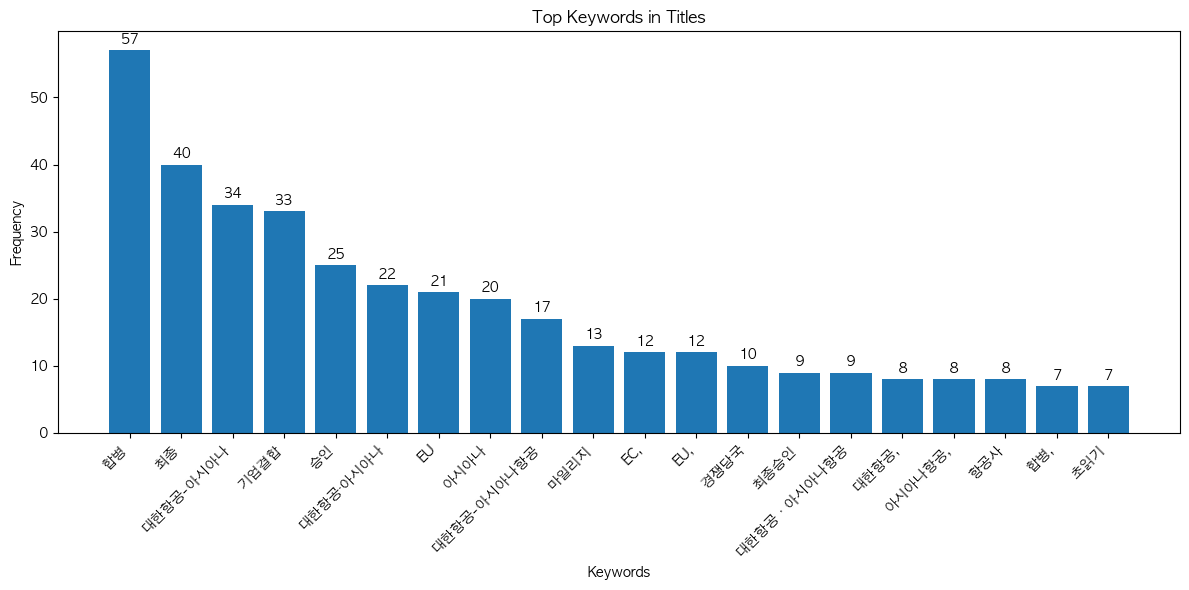

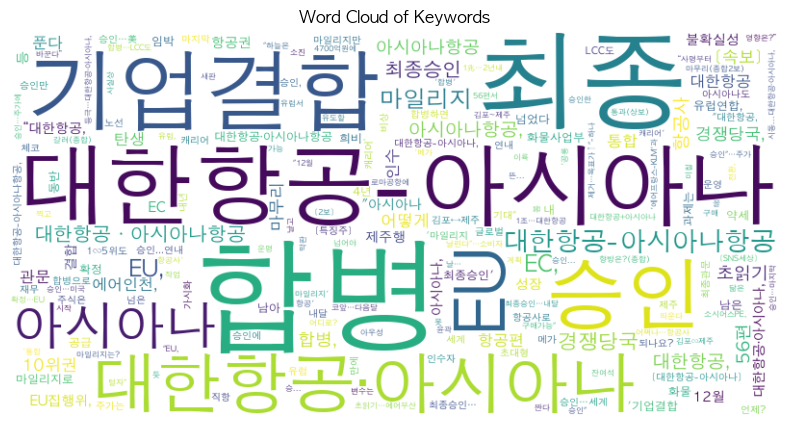

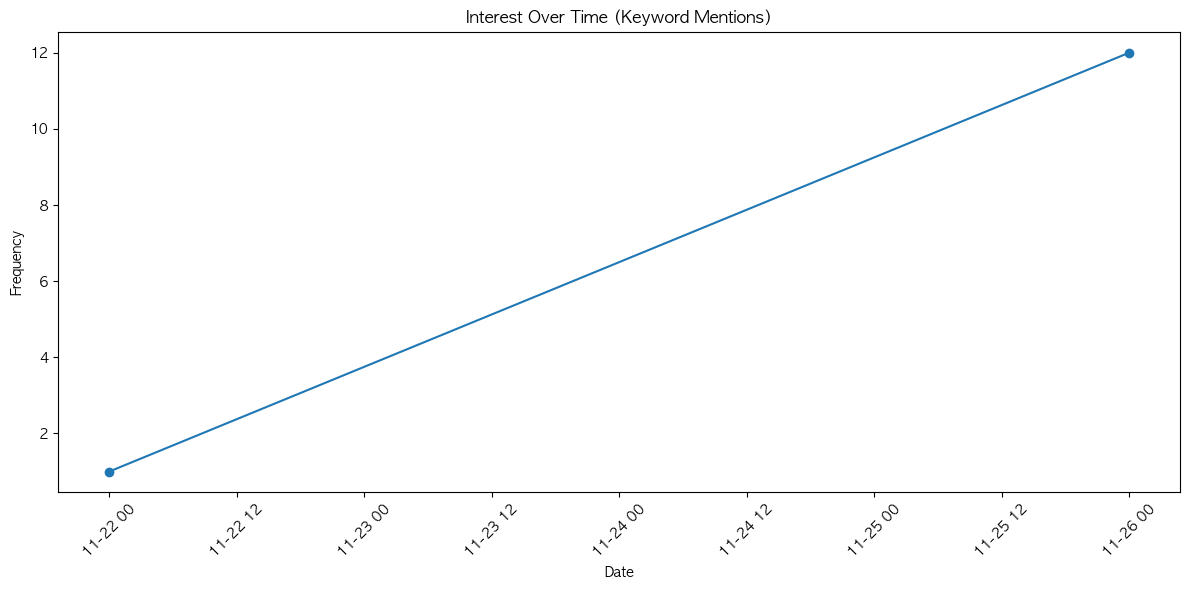

In [9]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud
from datetime import datetime

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

def search_naver_news(keyword, start_date, end_date, max_pages=1):
    base_url = "https://search.naver.com/search.naver"
    results = []
    
    for page in range(1, max_pages + 1):
        params = {
            'where': 'news',
            'query': keyword,
            'sm': 'tab_pge',
            'start': (page - 1) * 10 + 1,
            'nso': f'so:r,p:from{start_date}to{end_date}'
        }
        response = requests.get(base_url, params=params)
        print(response.status_code)
        if response.status_code != 200:
            print(f"Error fetching page {page}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        news_items = soup.select('ul.list_news > li')

        for item in news_items:
            title_tag = item.select_one('a.news_tit')
            title = title_tag.text if title_tag else 'No Title'
            link = title_tag['href'] if title_tag else 'No Link'
            summary_tag = item.select_one('div.dsc_wrap')
            summary = summary_tag.text if summary_tag else 'No Summary'
            date_tag = item.select_one('span.info')
            pub_date = date_tag.text if date_tag else 'No Date'

            results.append({'title': title, 'link': link, 'summary': summary, 'pub_date': pub_date})
        
        # 요청 간 간격을 두기 위해 추가
        time.sleep(2)
    
    return results

# 검색 실행
keyword = "아시아나"
start_date = "20240601"  # YYYYMMDD 형식
end_date = "20241130"
news_results = search_naver_news(keyword, start_date, end_date, max_pages=20)

# 중복 제거
unique_results = {result['link']: result for result in news_results}.values()

# 키워드 빈도 분석
titles = [item['title'] for item in unique_results]
word_counts = Counter(" ".join(titles).split())

# 시간별 관심도 분석
date_counts = Counter()
for item in unique_results:
    pub_date = item['pub_date']
    try:
        parsed_date = datetime.strptime(pub_date, '%Y.%m.%d.').date()
        date_counts[parsed_date] += 1
    except ValueError:
        continue

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top Keywords in Titles')
plt.ylabel('Frequency')
plt.xlabel('Keywords')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# 시간별 관심도 변화 그래프
if date_counts:
    sorted_dates = sorted(date_counts.items())
    dates, counts = zip(*sorted_dates)

    plt.figure(figsize=(12, 6))
    plt.plot(dates, counts, marker='o')
    plt.title('Interest Over Time (Keyword Mentions)')
    plt.ylabel('Frequency')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
Results saved to asiana_news_results_6wul.csv


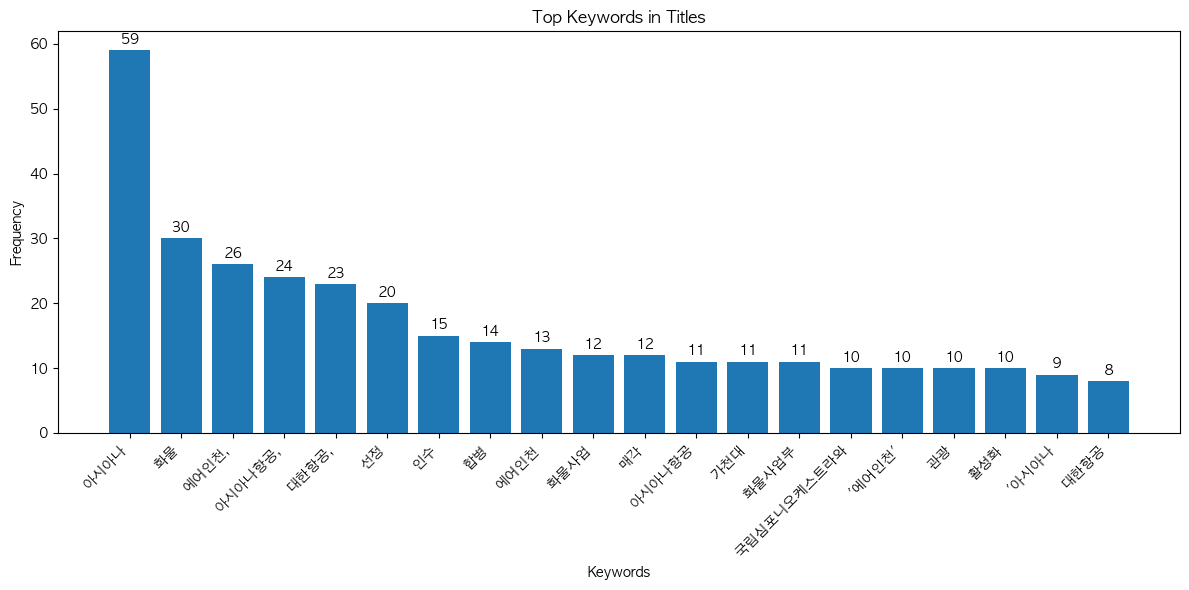

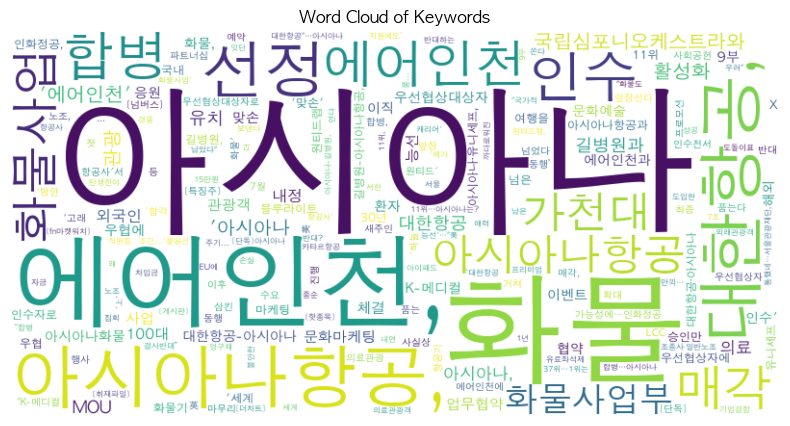

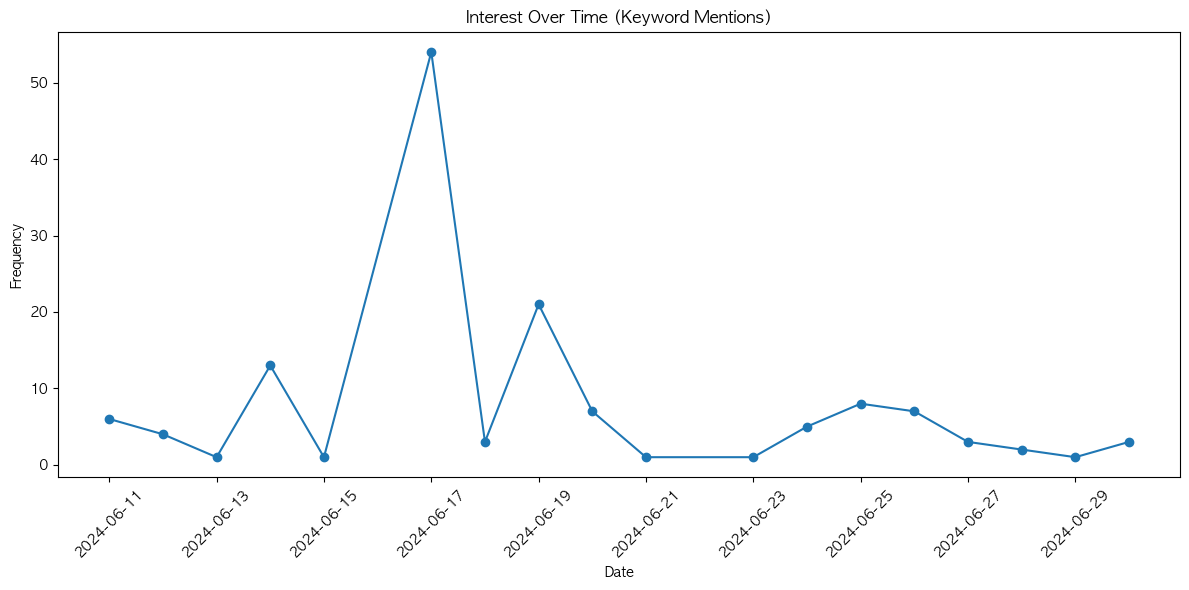

In [14]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud
from datetime import datetime
import csv

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

def search_naver_news(keyword, start_date, end_date, max_pages=1):
    base_url = "https://search.naver.com/search.naver"
    results = []
    
    for page in range(1, max_pages + 1):
        params = {
            'where': 'news',
            'query': keyword,
            'sm': 'tab_pge',
            'start': (page - 1) * 10 + 1,
            'nso': f'so:r,p:from{start_date}to{end_date}'
        }
        response = requests.get(base_url, params=params)
        print(response.status_code)
        if response.status_code != 200:
            print(f"Error fetching page {page}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        news_items = soup.select('ul.list_news > li')

        for item in news_items:
            title_tag = item.select_one('a.news_tit')
            title = title_tag.text if title_tag else 'No Title'
            link = title_tag['href'] if title_tag else 'No Link'
            summary_tag = item.select_one('div.dsc_wrap')
            summary = summary_tag.text if summary_tag else 'No Summary'
            date_tag = item.select_one('span.info')
            pub_date = date_tag.text if date_tag else 'No Date'

            results.append({'title': title, 'link': link, 'summary': summary, 'pub_date': pub_date})
        
        # 요청 간 간격을 두기 위해 추가
        time.sleep(2)
    
    return results

# 검색 실행
keyword = "아시아나"
start_date = "20240601"  # YYYYMMDD 형식
end_date = "20240630"
news_results = search_naver_news(keyword, start_date, end_date, max_pages=20)

# 중복 제거
unique_results = {result['link']: result for result in news_results}.values()

# CSV 파일로 저장
csv_filename = 'asiana_news_results_6wul.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['title', 'link', 'summary', 'pub_date']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(unique_results)

print(f"Results saved to {csv_filename}")

# 키워드 빈도 분석
titles = [item['title'] for item in unique_results]
word_counts = Counter(" ".join(titles).split())

# 시간별 관심도 분석
date_counts = Counter()
for item in unique_results:
    pub_date = item['pub_date']
    try:
        parsed_date = datetime.strptime(pub_date, '%Y.%m.%d.').date()
        date_counts[parsed_date] += 1
    except ValueError:
        continue

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top Keywords in Titles')
plt.ylabel('Frequency')
plt.xlabel('Keywords')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# 시간별 관심도 변화 그래프
if date_counts:
    sorted_dates = sorted(date_counts.items())
    dates, counts = zip(*sorted_dates)

    plt.figure(figsize=(12, 6))
    plt.plot(dates, counts, marker='o')
    plt.title('Interest Over Time (Keyword Mentions)')
    plt.ylabel('Frequency')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud
from datetime import datetime
import csv

# 한글 폰트 경로 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # 사용자 환경에 맞게 경로 수정
rc('font', family='AppleGothic')  # Mac

def search_naver_news(keyword, start_date, end_date, max_pages=1):
    base_url = "https://search.naver.com/search.naver"
    results = []
    
    for page in range(1, max_pages + 1):
        params = {
            'where': 'news',
            'query': keyword,
            'sm': 'tab_pge',
            'start': (page - 1) * 10 + 1,
            'nso': f'so:r,p:from{start_date}to{end_date}'
        }
        response = requests.get(base_url, params=params)
        print(response.status_code)
        if response.status_code != 200:
            print(f"Error fetching page {page}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        news_items = soup.select('ul.list_news > li')

        for item in news_items:
            title_tag = item.select_one('a.news_tit')
            title = title_tag.text if title_tag else 'No Title'
            link = title_tag['href'] if title_tag else 'No Link'
            summary_tag = item.select_one('div.dsc_wrap')
            summary = summary_tag.text if summary_tag else 'No Summary'
            date_tag = item.select_one('span.info')
            pub_date = date_tag.text if date_tag else 'No Date'

            results.append({'title': title, 'link': link, 'summary': summary, 'pub_date': pub_date})
        
        # 요청 간 간격을 두기 위해 추가
        time.sleep(2)
    
    return results

# 검색 실행
keyword = "아시아나"
start_date = "20240701"  # YYYYMMDD 형식
end_date = "20240731"
news_results = search_naver_news(keyword, start_date, end_date, max_pages=20)

# 중복 제거
unique_results = {result['link']: result for result in news_results}.values()

# CSV 파일로 저장
csv_filename = 'asiana_news_results_7wul.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['title', 'link', 'summary', 'pub_date']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(unique_results)

print(f"Results saved to {csv_filename}")

# 키워드 빈도 분석
titles = [item['title'] for item in unique_results]
word_counts = Counter(" ".join(titles).split())

# 시간별 관심도 분석
date_counts = Counter()
for item in unique_results:
    pub_date = item['pub_date']
    try:
        parsed_date = datetime.strptime(pub_date, '%Y.%m.%d.').date()
        date_counts[parsed_date] += 1
    except ValueError:
        continue

# 상위 20개 단어 추출
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Top Keywords in Titles')
plt.ylabel('Frequency')
plt.xlabel('Keywords')

# 막대 위에 카운트 표시
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 워드클라우드 시각화
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

# 시간별 관심도 변화 그래프
if date_counts:
    sorted_dates = sorted(date_counts.items())
    dates, counts = zip(*sorted_dates)

    plt.figure(figsize=(12, 6))
    plt.plot(dates, counts, marker='o')
    plt.title('Interest Over Time (Keyword Mentions)')
    plt.ylabel('Frequency')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
